In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data , dataset.target

y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced!=1]=0
X_train, X_test, y_train, y_test = train_test_split(X , y_binary_imbalanced, random_state = 0)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

/home/kevin/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

/home/kevin/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0, -29.828792711672488),
 (0, -19.382957109499127),
 (0, -29.19825322067861),
 (0, -21.74612387948459),
 (0, -22.642407236927426),
 (0, -11.806050021306163),
 (1, 6.496020552980545),
 (0, -23.35453808405472),
 (0, -27.54326658096012),
 (0, -26.888223247129996),
 (0, -31.86256621302586),
 (0, -22.48615392659086),
 (0, -25.317985498201264),
 (0, -13.384584682175142),
 (0, -13.565592590976616),
 (0, -13.308427911127662),
 (1, 12.180706869225581),
 (0, -34.36252159826179),
 (0, -13.231484752785697),
 (0, -29.593912734993275)]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

/home/kevin/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0, 1.1105034790882899e-13),
 (0, 3.820222716344996e-09),
 (0, 2.0862182730725365e-13),
 (0, 3.5956581570681586e-10),
 (0, 1.4673289290364326e-10),
 (0, 7.459236606370296e-06),
 (1, 0.9984928409873813),
 (0, 7.198681892725635e-11),
 (0, 1.091720110023291e-12),
 (0, 2.1018078782906807e-12),
 (0, 1.4529923053720784e-14),
 (0, 1.715486996322e-10),
 (0, 1.0105053221776575e-11),
 (0, 1.5386791246412203e-06),
 (0, 1.283918440086462e-06),
 (0, 1.660437275072088e-06),
 (1, 0.9999948715751753),
 (0, 1.192741926582645e-15),
 (0, 1.7932399504984506e-06),
 (0, 1.404517003495401e-13)]

<IPython.core.display.Javascript object>


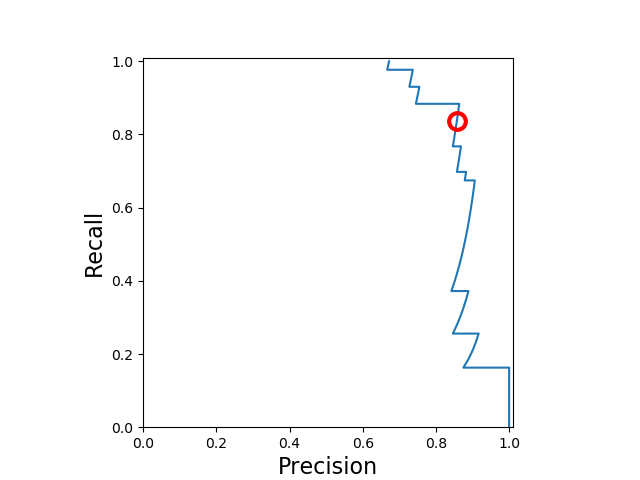

<ipython-input-6-2df46f6198e5>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


In [6]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

/home/kevin/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<IPython.core.display.Javascript object>


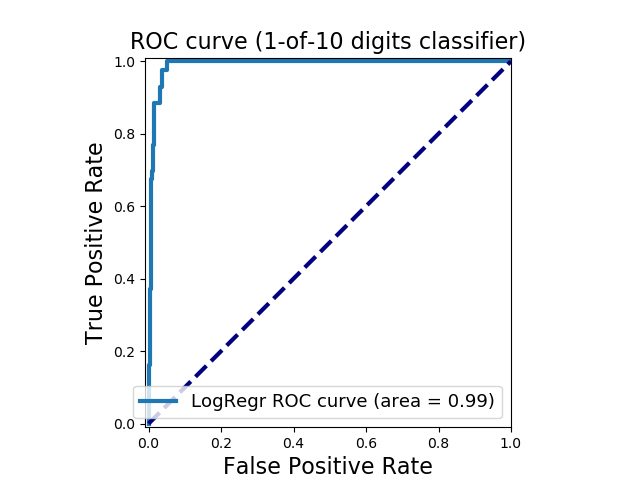

<ipython-input-7-80beae7a2e67>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


In [7]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


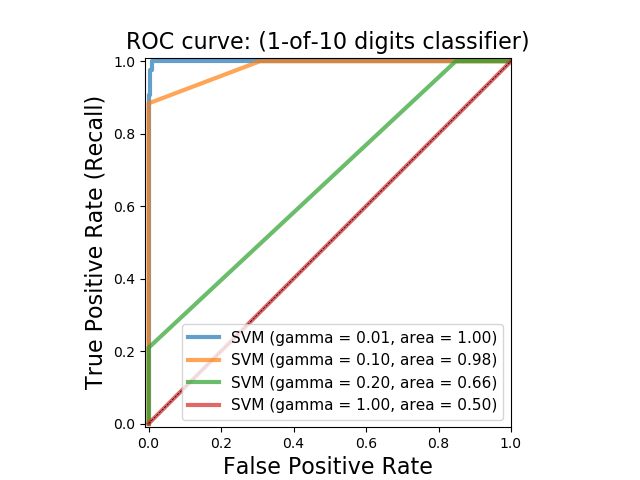

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


<ipython-input-10-f51d43e980ce>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


In [10]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()